In [15]:
print("Дослідження та візуалізація даних за допомогою Python")
print("Мета: отримати базові навики використання Python для дослідження та візуалізації даних.")


Дослідження та візуалізація даних за допомогою Python
Мета: отримати базові навики використання Python для дослідження та візуалізації даних.


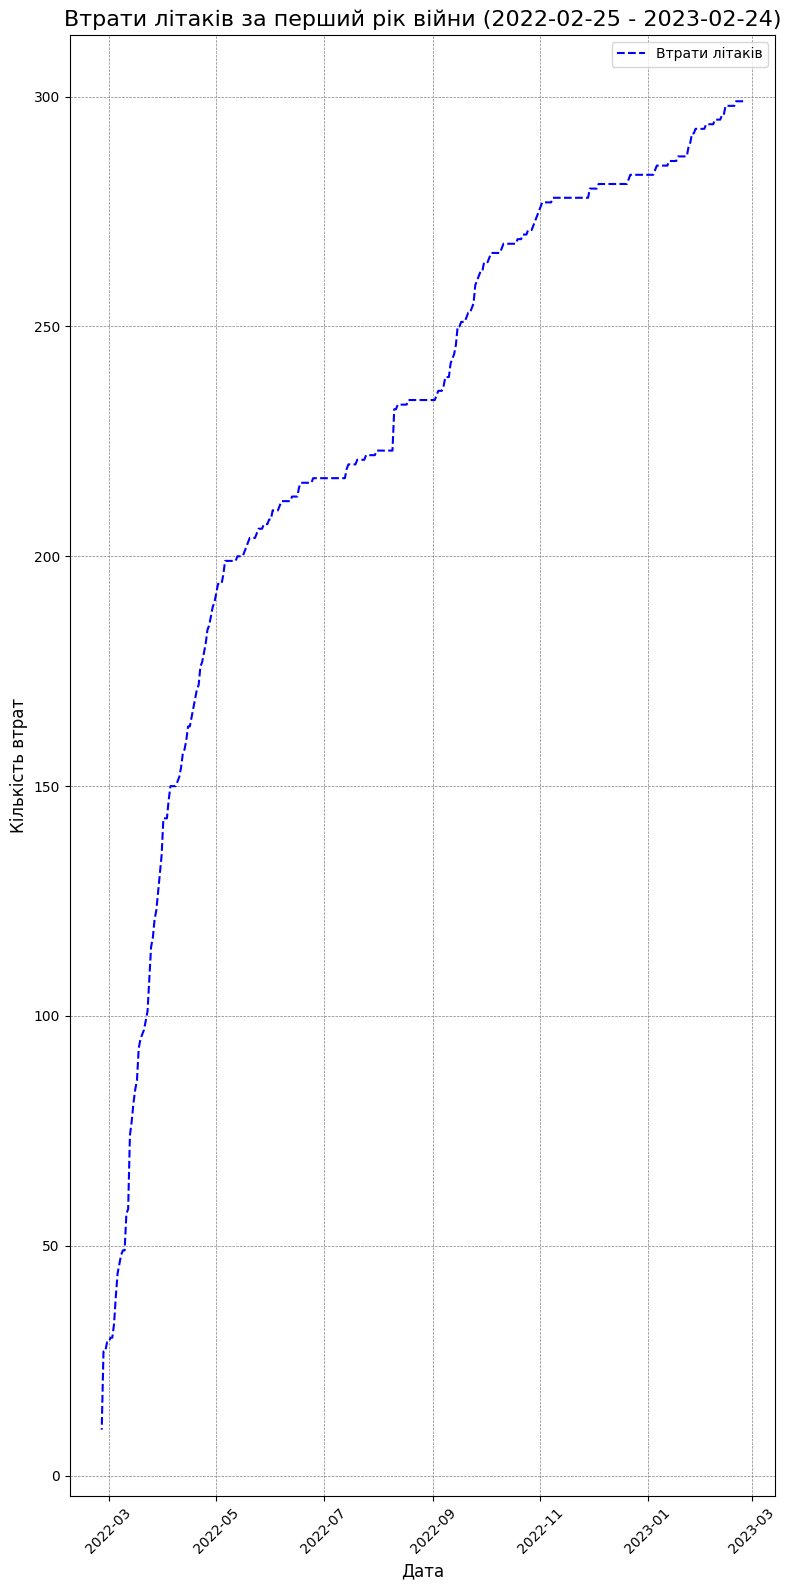

Три найбільші добові втрати літаків: [17 16 10]
Загальна кількість втрат літаків з 1 червня по 31 серпня 2022 року: 26
Середнє значення втрат за період з 2024-01-23 по 2024-11-17: 0.13377926421404682

Добові втрати літаків:
Дата: 2024-11-17, Добова втрата: 0
Дата: 2024-11-16, Добова втрата: 0
Дата: 2024-11-15, Добова втрата: 0
Дата: 2024-11-14, Добова втрата: 0
Дата: 2024-11-13, Добова втрата: 0
Дата: 2024-11-12, Добова втрата: 0
Дата: 2024-11-11, Добова втрата: 0
Дата: 2024-11-10, Добова втрата: 0
Дата: 2024-11-09, Добова втрата: 0
Дата: 2024-11-08, Добова втрата: 0
Дата: 2024-11-07, Добова втрата: 0
Дата: 2024-11-06, Добова втрата: 0
Дата: 2024-11-05, Добова втрата: 0
Дата: 2024-11-04, Добова втрата: 0
Дата: 2024-11-03, Добова втрата: 0
Дата: 2024-11-02, Добова втрата: 0
Дата: 2024-11-01, Добова втрата: 0
Дата: 2024-10-31, Добова втрата: 0
Дата: 2024-10-30, Добова втрата: 0
Дата: 2024-10-29, Добова втрата: 0
Дата: 2024-10-28, Добова втрата: 0
Дата: 2024-10-27, Добова втрата: 0
Дата: 

In [16]:
import csv
import numpy as np
import matplotlib.pyplot as plt

def read_column(file_name, column_index):
    with open(file_name, 'r', encoding='utf-8') as f:
        reader = csv.reader(f)
        next(reader) 
        column_data = np.array([int(row[column_index]) for row in reader if row[column_index].isdigit() and int(row[column_index]) >= 0])
    return column_data

def read_dates(file_name, date_index):
    with open(file_name, 'r', encoding='utf-8') as f:
        reader = csv.reader(f)
        next(reader) 
        dates = np.array([row[date_index] for row in reader])
    return np.array(dates, dtype='datetime64[D]')

def calculate_daily_losses(aircraft_losses):
    daily_losses = np.diff(aircraft_losses)  
    daily_losses = np.append(daily_losses, aircraft_losses[-1])  
    return np.abs(daily_losses) 

def top_3_losses(daily_losses):
    top_losses = np.partition(daily_losses, -3)[-3:]
    return np.sort(top_losses)[::-1] 
    
def summer_losses(dates, daily_losses):
    summer_mask = (dates >= np.datetime64('2022-06-01')) & (dates <= np.datetime64('2022-08-31'))
    return np.sum(daily_losses[summer_mask])

def average_loss_2024(dates, daily_losses):
    period_mask = (dates[1:] >= np.datetime64('2024-01-23')) & (dates[1:] <= np.datetime64('2024-11-17'))
    return np.mean(daily_losses[1:][period_mask]) 

def first_year_losses(dates, aircraft_losses):
    first_year_mask = (dates >= np.datetime64('2022-02-25')) & (dates <= np.datetime64('2023-02-24'))
    return aircraft_losses[first_year_mask], dates[first_year_mask]

file_name = 'russia_losses_equipment.csv'
column_index = 2
date_index = 0

aircraft_losses = read_column(file_name, column_index)
dates = read_dates(file_name, date_index)

daily_losses = calculate_daily_losses(aircraft_losses)

top_3 = top_3_losses(daily_losses)

summer_total = summer_losses(dates, daily_losses)

avg_loss_2024 = average_loss_2024(dates, daily_losses)

first_year_losses_data, first_year_dates = first_year_losses(dates, aircraft_losses)

plt.figure(figsize=(8, 16), dpi=100)
plt.plot(first_year_dates, first_year_losses_data, label="Втрати літаків", linestyle='--', color='blue')
plt.title("Втрати літаків за перший рік війни (2022-02-25 - 2023-02-24)", fontsize=16)
plt.xlabel("Дата", fontsize=12)
plt.ylabel("Кількість втрат", fontsize=12)
plt.xticks(rotation=45)
plt.legend(fontsize=10)
plt.grid(color='gray', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.savefig("aircraft_losses_first_year_graph.png")
plt.show()

daily_losses_dates = dates

combined_data = np.column_stack((daily_losses_dates.astype(str), daily_losses.astype(str)))

formatted_output = [f"Дата: {date}, Добова втрата: {loss}" for date, loss in combined_data]

print("Три найбільші добові втрати літаків:", top_3)
print("Загальна кількість втрат літаків з 1 червня по 31 серпня 2022 року:", summer_total)
print("Середнє значення втрат за період з 2024-01-23 по 2024-11-17:", avg_loss_2024)
print("\nДобові втрати літаків:")
print("\n".join(formatted_output))
column_name = "Втрати літаків"

aircraft_losses = read_column(file_name, column_index)
dates = read_dates(file_name, date_index)

print(f"Масив значень стовпця '{column_name}':")
print(aircraft_losses)